In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Embedding, Conv1D, SpatialDropout1D, MaxPooling1D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from gensim.models import word2vec

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
!wget 'https://github.com/a18091986/MachineLearning/raw/main/Datasets/spam_sms.csv' -O 'spam.csv'

--2022-05-05 07:44:22--  https://github.com/a18091986/MachineLearning/raw/main/Datasets/spam_sms.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a18091986/MachineLearning/main/Datasets/spam_sms.csv [following]
--2022-05-05 07:44:22--  https://raw.githubusercontent.com/a18091986/MachineLearning/main/Datasets/spam_sms.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58670 (57K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>]  57.29K  --.-KB/s    in 0.01s   

2022-05-05 07:44:22 (5.04 MB/s) - ‘spam.csv’ saved [58670/58670]



In [28]:
df = pd.read_csv('spam.csv')
# print(df.shape)
df.drop(df.columns[[0,1,2]], axis = 1, inplace = True)
df.iloc[:,1] = df.iloc[:,1].astype('uint8')
x_data = df.iloc[:, 0].values
# x_data
y_data = df.iloc[:, 1].values
# y_data

x_data_classes = [''.join(x_data[y_data == 0])]
x_data_classes.append(''.join(x_data[y_data == 1]))

y_data = utils.to_categorical(y_data, 2, dtype = 'uint8')

data = ''.join(x_data)

num = 0.3
# len(x_data)
idx_data = int(len(x_data) * num)


X_Train = x_data[:-idx_data]
y_train = y_data[:-idx_data]

X_Test = x_data[-idx_data:]
y_test = y_data[-idx_data:]


In [36]:
max_words_count = 3000
tokenizer = Tokenizer(num_words=max_words_count, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')
tokenizer.fit_on_texts(x_data)

for_hist_nums = np.array(tokenizer.texts_to_sequences(x_data_classes))
# print(X_Train)
X_train = tokenizer.texts_to_sequences(X_Train)
X_test = tokenizer.texts_to_sequences(X_Test)
# print(X_train)

xlen = 15
x_train_em = pad_sequences(X_train, padding = 'post', maxlen = xlen)
x_test_em = pad_sequences(X_test, padding = 'post', maxlen = xlen)

x_train_bow = tokenizer.sequences_to_matrix(x_train_em.tolist()).astype('uint8')
x_test_bow = tokenizer.sequences_to_matrix(x_test_em.tolist()).astype('uint8')

# x_train_bow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


Epoch 1/100
2/2 [==============================] - 2s 426ms/step - loss: 1.0010 - accuracy: 0.5755 - val_loss: 0.6791 - val_accuracy: 0.5238
Epoch 2/100
2/2 [==============================] - 0s 125ms/step - loss: 0.4259 - accuracy: 0.7755 - val_loss: 0.6549 - val_accuracy: 0.6286
Epoch 3/100
2/2 [==============================] - 0s 71ms/step - loss: 0.1609 - accuracy: 0.9347 - val_loss: 0.6359 - val_accuracy: 0.6857
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 0.0969 - accuracy: 0.9673 - val_loss: 0.6207 - val_accuracy: 0.7238
Epoch 5/100
2/2 [==============================] - 0s 78ms/step - loss: 0.0512 - accuracy: 0.9878 - val_loss: 0.6084 - val_accuracy: 0.7619
Epoch 6/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0246 - accuracy: 0.9959 - val_loss: 0.5976 - val_accuracy: 0.7810
Epoch 7/100
2/2 [==============================] - 0s 69ms/step - loss: 0.0223 - accuracy: 0.9959 - val_loss: 0.5885 - val_accuracy: 0.7810
Epoch 8/100
2/2 [=

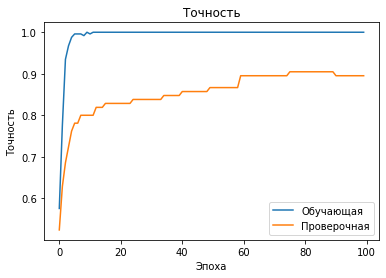

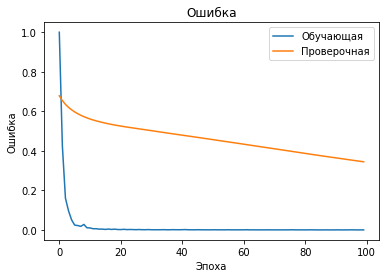

In [42]:
model = Sequential()
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(x_train_bow, y_train, validation_data = (x_test_bow, y_test), epochs = 100, batch_size = 128)

plt.plot(result.history['accuracy'], label = 'Обучающая')
plt.plot(result.history['val_accuracy'], label = 'Проверочная')
plt.title('Точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()
plt.plot(result.history['loss'], label = 'Обучающая')
plt.plot(result.history['val_loss'], label = 'Проверочная')
plt.title('Ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 4.3599e-05 - accuracy: 1.0000 - val_loss: 0.2094 - val_accuracy: 0.9238
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 2.4037e-05 - accuracy: 1.0000 - val_loss: 0.2091 - val_accuracy: 0.9238
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 4.4667e-05 - accuracy: 1.0000 - val_loss: 0.2090 - val_accuracy: 0.9238
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 2.6729e-05 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9238
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 2.4247e-05 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9238
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 3.2760e-05 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9238
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 2.2113e-05 - accuracy: 1.0000 - val_loss: 0.2089 - val_accuracy

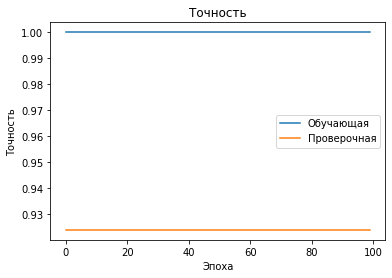

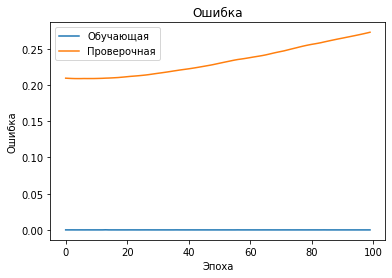

In [44]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(x_train_bow, y_train, validation_data = (x_test_bow, y_test), epochs = 100, batch_size = 128)

plt.plot(result.history['accuracy'], label = 'Обучающая')
plt.plot(result.history['val_accuracy'], label = 'Проверочная')
plt.title('Точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()
plt.plot(result.history['loss'], label = 'Обучающая')
plt.plot(result.history['val_loss'], label = 'Проверочная')
plt.title('Ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [45]:
predictions = np.array([np.argmax(i) for i in model.predict(x_test_bow)])
y_test_real = np.array([np.argmax(i) for i in y_test])
for i in range(20,34):
    print(f'Предсказано - {predictions[i]}, было {y_test_real[i]},  {predictions[i]==y_test_real[i]}')
print(f'\n Процент верных предсказаний - {round((predictions == y_test_real).mean()*100,2)} %')

Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 1, было 1,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 1,  False
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 0, было 0,  True
Предсказано - 1, было 1,  True
Предсказано - 0, было 0,  True

 Процент верных предсказаний - 92.38 %


In [46]:
def word_func(arg, edge):
    ''' 
    Input: 
        arg - Словарь частнотности слов 
        edge - Край, по которому будут выбраны все слова, кол-во символов которых больше числа edge
    
    Return:
        indexes - индексы в порядке возрастания значений arg и тех, кто прошёл порог(edge).
        '''
    indexes = []  # Здесь будут индексы
    uniq_nums = sorted(set(arg.values()), reverse=True)  # Получим все уникальные значения arg словаря
    all_nums = list(arg.values())  #  Получим все значения arg словаря 
    for i in uniq_nums:  # Проходимся по уникальным значениям
        for idx, n in enumerate(all_nums):  # Проходимся по всем элементам значеням arg словаря и не забываем уточнить их индексы
            if n==i and idx!=0 and len(tokenizer.index_word[idx])>edge:  # Проверка на то, что текущее значение из всех элементов равно тому, по которому делаем фильтр(i), проверяем, чтобы индексы не был равен 0
                                                                         # Иначе может быть ошибка. Так же проверяем на порог.
                indexes.append(idx)
    return indexes


10 частых слова длинее 0-ёх символов: 

the 9.27 %
this 8.22 %
views 6.32 %
to 5.37 %
2 5.06 %
is 4.53 %
i 4.32 %
billion 4.0 %
video 3.58 %
and 2.95 %

10 частых слова длинее 3-ёх символов: 

this 8.22 %
views 6.32 %
billion 4.0 %
video 3.58 %
song 2.11 %
just 2.0 %
youtube 1.9 %
people 1.9 %
have 1.58 %
that 1.37 %


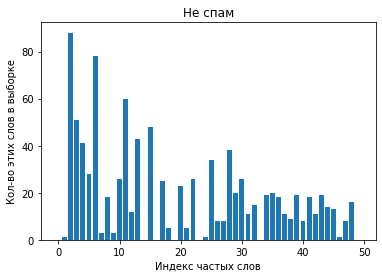


10 частых слова длинее 0-ёх символов: 

my 6.42 %
i 5.47 %
and 5.47 %
to 5.39 %
http 4.99 %
com 4.04 %
www 4.04 %
you 3.88 %
check 3.72 %
subscribe 3.57 %

10 частых слова длинее 3-ёх символов: 

http 4.99 %
check 3.72 %
subscribe 3.57 %
channel 3.33 %
please 3.25 %
like 2.38 %
https 2.3 %
image2you 1.58 %
have 1.51 %
this 1.03 %


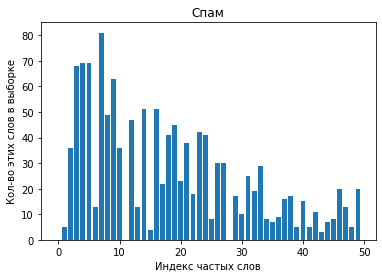

In [47]:
for i in range(len(for_hist_nums)):  
    for_hist_nums[i] = np.array(for_hist_nums[i])  # Превращаем листы в numpy массивы для работы без ошибок
    
edge = 50  # Граница кол-ва частотных слов
for_edge = 10  # Граница просмотра первых for_edge слов.
for j in range(2):  # Проходимся по всем классам(2)
    nums = {i:len(for_hist_nums[j][for_hist_nums[j]==i]) for i in range(edge)}  # Создаём текущий словарь {индексов : кол-ва слов} в данном классе.
    for edge_min in (0,3):  # Сначала он пройдётся по границе 0, потом по границе 3
        indexes = word_func(nums, edge_min)  # Получем отсортированный список индексов 
        print(f'\n{for_edge} частых слова длинее {edge_min}-ёх символов: \n')
        for g in indexes[:for_edge]:
            print(tokenizer.index_word[g], round(100*nums[g]/sum(nums.values()),2), '%') # Выводим слово и его процентное соотношение 
    plt.bar(range(0,50),list(nums.values()))
    plt.title('Не спам' if j==0 else 'Спам')
    plt.xlabel('Индекс частых слов')
    plt.ylabel('Кол-во этих слов в выборке')
    plt.show()

In [48]:
y_test_nums = np.array([np.argmax(i) for i in y_test])  # Получаем все y_test значения ввиде чисел
for i in range(10,20):
    n = np.random.randint(0,2)  # Случайный класс
    seq = x_test_em[y_test_nums==n][i]  # Нужен для преобразования последовательности индексов в слова
    matrix_ = x_test_bow[y_test_nums==n][i]  # Нужен для предикта модели
    print('\n',*tokenizer.sequences_to_texts(seq[None]))  # Получаем предложение
    print('СПАМ' if np.argmax(model.predict(matrix_[None]))==1 else 'Не Спам')  # Получаем класс


 if i get 300 subscribers by tomorrow i'll do a epic hunger games video unknown
СПАМ

 c'mon 3 billion views unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown
Не Спам

 if i reach 100 subscribers i will tazz my self and my friend unknown unknown
СПАМ

 heart https www indiegogo com projects i want to go to college 19 x 9082175
СПАМ

 lol unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown
Не Спам

 millisecond you can see that that chick is about to laugh takes a few tries
СПАМ

 does this have 2 billion views when there are only 3 people in the world'
Не Спам

 psy is a good guy unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown
Не Спам

 https www facebook com nicushorbboy add mee lt 3 lt 3 unknown unknown unknown unknown
СПАМ

 can and get my hair curled too http www gofundme com dressprettyonce thanks omg please
СПАМ
